<h1 align='center'>Домашнее задание</h1>

**Дополнительный материал для выполнения дз**:

- Лекция Coursera: https://ru.coursera.org/learn/machine-learning/lecture/4BHEy/regularized-logistic-regression
- Статья на Хабре: https://habrahabr.ru/company/io/blog/265007/
- Книжка ISLR, 4 глава: http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf
- Логистическая регрессия, UFLDL Tutorial: http://ufldl.stanford.edu/tutorial/supervised/LogisticRegression/
- Линейная регрессия, UFLDL Tutorial: http://ufldl.stanford.edu/tutorial/supervised/LinearRegression/


<h1 align='center'>Overview</h1>

На последней лекции вы узнали про классические модели машинного обучения, которые каждый Data Scientist должен знать и понимать, как они работают.

В этом домашнем задании мы предлагаем вам реализовать две модели: одну линейную -- логистическую регрессию, и модель бустинга над деревьями, а также сравнить их качество на одном датасете.

-----------

<h1 align='center'>Logistic Regression</h1>

In [2]:
import pandas as pd
import numpy as np
import tqdm # interactive progress bar

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## 1. Знакомство с данными
Данные представляют собой выборку отзывов о еде с сайта Амазон. Для них проставлены метки -- положительный или отрицательный отзыв.

In [3]:
train_df = pd.read_csv('./data/train.csv')

In [61]:
print(train_df.shape)

(110163, 3)


In [6]:
train_df.Prediction.value_counts(normalize=True)

0    0.50074
1    0.49926
Name: Prediction, dtype: float64

Видим, что классы сбалансированы. Можем оценивать качество модели по метрике ```accuracy```.

In [134]:
train_df.head()

,ID,Reviews_Summary,Prediction
0,239071,Michigan Cherries,1
1,466160,Great Product,1
2,397133,Ovaltine,1
3,297146,~,1
4,292685,Love it!,1


In [15]:
train_df.tail()

,ID,Reviews_Summary,Prediction
110158,486256,Terrible!,0
110159,199050,"Cheap Coffee, No Banana Flavor",0
110160,278179,Not as described,0
110161,87500,Tastes like a squirt of toothpaste mixed into ...,0
110162,121963,Disappointed,0



----------
## 2. Извлечение признаков
Для решения задачи классификации необходимо преобразовать каждый отзыв (документ) в вектор. Размерность данного вектора будет равна количеству слов используемых в корпусе (все документы). Каждая координата соответствует слову, значение в координате равно количеству раз, слово используется в документе. 

Для решения данной задачи напишем код, который преобразовывает матрицу документов в численную матрицу.

Дополнительная информация:

- Подробнее про векторное представление документов: http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
- Разряженные матрицы: http://www.scipy-lectures.org/advanced/scipy_sparse/
- Трансформер: http://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage
- Подробнее про разреженные матрицы: http://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.html
- Hashing trick: https://en.wikipedia.org/wiki/Feature_hashing

Помните, что все эти трансформеры возвращают ```sparse```-матрицы. Учитывая это и то, что линейные модели достаточно хорошо масштабируются на большое количество фич, можно смело ставить ```n_features``` 1000+.

In [8]:
review_summaries = list(train_df['Reviews_Summary'].values)
review_summaries = [l.lower() for l in review_summaries]

In [9]:
review_summaries[:5]

['michigan cherries', 'great product', 'ovaltine', '~', 'love it!']

Преобразуем ```review_summaries``` с помощью ```TfidfVectorizer```.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
vectorizer = TfidfVectorizer()

In [12]:
tfidfed = vectorizer.fit_transform(review_summaries)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = tfidfed
y = train_df.Prediction.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

/Users/olegborzov/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## 3. Логистическая регрессия

Логистическая регрессия -- линейный классификатор, который очень часто используется на практике, например, в кредитном скоринге. Преимущества этой модели -- скорость обучения и предсказания (даже при сотнях тысяч фичей) а также интепретируемость: важные признаки имеют бОльшие по модулю веса. 

При этом отрицательные веса говорят, что фича важна для определения класса 0, а положительные -- для определения класса 1. Это можно понять, если вспомнить, что разделяющая поверхность линейных моделей, это $w^Tx = 0$, а значение алгоритма есть $a(x) = sign(w^Tx)$.

Будем предсказывать сентимент, подготовим данные и сделаем валидационную выборку. При этом нужно оценивать качество модели не по обучающей выборке, а по валидационной. Иначе вы переобучитесь, когда будете тюнить гиперпараметры модели.

-----
** Реализуйте код в модуле ```dmia.classifiers.logistic_regression```.**

-----

In [290]:
from dmia.gradient_check import *
from dmia.classifiers import logistic_regression as lr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import imp
imp.reload(lr)

<module 'dmia.classifiers.logistic_regression' from '/Users/olegborzov/Dropbox/РАБОТА/Programming/PycharmProjects/otus-python-0218-homework/homework/10_numpy/homework/dmia/classifiers/logistic_regression.py'>

## Gradient check

В этой ячейке вы можете проверить, правильно ли у вас все работает, прежде чем обучать модель на всех данных.

In [168]:
def calc_probabilities(X, w):
    z = X.dot(w)
    return 1.0 / (1.0 + np.exp(-z))

In [239]:
# res = X_batch.T.dot(predictions-y_batch)
w

array([ -4.42919679e-03,  -5.16499234e-03,   7.64249505e-03, ...,
        -5.37765847e-03,  -8.20500979e-05,  -2.58871188e-03])

In [242]:
reg = 0.0
X_batch = X_train[:1000]
y_batch = y_train[:1000]
w = np.random.randn(X_batch.shape[1]) * 2

num_train = X_batch.shape[0]
predictions = calc_probabilities(X_batch, w)
y1_cost = -y_batch.dot(np.log(predictions))
y0_cost = (1.0-y_batch).dot(np.log(1.0-predictions))

loss = y1_cost - y0_cost
dw = X_batch.T.dot(predictions - y_batch)

loss /= num_train
dw /= num_train

loss += reg * np.dot(w[:-1], w[:-1])
dw[:-1] = reg * w[:-1]

In [244]:
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]
clf = lr.LogisticRegression()
clf.w = np.random.randn(X_train_sample.shape[1]+1) * 2
loss, grad = clf.loss(lr.LogisticRegression.append_biases(X_train_sample), y_train_sample, 0.0)

In [246]:
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]
clf = LogisticRegression()
clf.w = np.random.randn(X_train_sample.shape[1]+1) * 2
loss, grad = clf.loss(LogisticRegression.append_biases(X_train_sample), y_train_sample, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
f = lambda w: clf.loss(LogisticRegression.append_biases(X_train_sample), y_train_sample, 0.0)[0]
grad_numerical = grad_check_sparse(f, clf.w, grad, 10)

numerical: 0.000000 analytic: -0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: -0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: -0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: -0.000000, relative error: nan


/Users/olegborzov/Dropbox/РАБОТА/Programming/PycharmProjects/otus-python-0218-homework/homework/10_numpy/homework/dmia/gradient_check.py:51: RuntimeWarning: invalid value encountered in double_scalars
  abs(grad_numerical) + abs(grad_analytic)


Обучите свою модель на ```X_train, y_train```.

Для начала можете взять параметры по умолчанию, и найти оптимальные используя валидацию.

In [296]:
clf = LogisticRegression()

In [300]:
clf.train(X_train, y_train, learning_rate=0.1, num_iters=1000, batch_size=1000, reg=0.1, verbose=True)

iteration 0 / 1000: loss 0.693321
iteration 100 / 1000: loss 0.692721
iteration 200 / 1000: loss 0.693600
iteration 300 / 1000: loss 0.693049
iteration 400 / 1000: loss 0.692860
iteration 500 / 1000: loss 0.692634
iteration 600 / 1000: loss 0.693284
iteration 700 / 1000: loss 0.693044
iteration 800 / 1000: loss 0.693241
iteration 900 / 1000: loss 0.693113


Посмотрим на качество на валидации.

In [301]:
print("Train f1-score = %.3f" % accuracy_score(y_train, clf.predict(X_train)))
print("Test f1-score = %.3f" % accuracy_score(y_test, clf.predict(X_test)))

Train f1-score = 0.757
Test f1-score = 0.753


Нарисуем кривые обучения.

In [304]:
clf = LogisticRegression()
train_scores = []
test_scores = []
num_iters = 1000

for i in tqdm.trange(num_iters):
    # Сделайте один шаг градиентного спуска с помощью num_iters=1
    clf.train(X_train, y_train, learning_rate=1.0, num_iters=1, batch_size=256, reg=1e-3)
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, clf.predict(X_test)))

100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s]


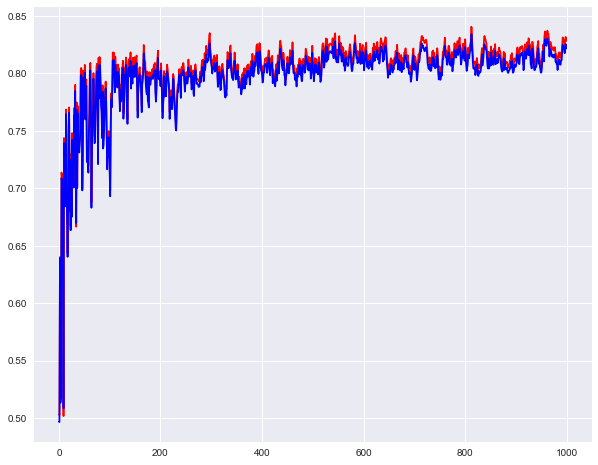

In [305]:
plt.figure(figsize=(10,8))
plt.plot(train_scores, 'r', test_scores, 'b')

## 4. Задание

* Обучим нашу модель **на всех данных**, преобразовав их через ```TfidfVectorizer``` с ```max_features=3000```.

* Параметры модели ```learning_rate=1.0, num_iters=1000, batch_size=256, reg=1e-3``` и выведем первые 5 самых важных фичей для класса 1 и 5 фичей для класса 0. Убедимся, что они коррелируют с вашей интуицией о хороших/плохих отзывах. 

**Hint:** зная индекс фичи, само слово вы можете получить, используя метод ```vectorizer.get_feature_names()```.

**Hint:** ```np.argsort```.

In [309]:
# Обучите модель
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(review_summaries)
y = train_df.Prediction.values
clf = LogisticRegression()
clf.train(X, y, verbose=True, learning_rate=1.0, num_iters=1000, batch_size=256, reg=1e-3)

iteration 0 / 1000: loss 0.693166
iteration 100 / 1000: loss 0.630752
iteration 200 / 1000: loss 0.607089
iteration 300 / 1000: loss 0.569816
iteration 400 / 1000: loss 0.575261
iteration 500 / 1000: loss 0.551160
iteration 600 / 1000: loss 0.600370
iteration 700 / 1000: loss 0.575778
iteration 800 / 1000: loss 0.596806
iteration 900 / 1000: loss 0.596826


In [312]:
# Получите индексы фичей
pos_features = np.argsort(clf.w)[-25:]
neg_features = np.argsort(clf.w)[:25]

In [313]:
# Выведите слова
fnames = vectorizer.get_feature_names()
print([fnames[p] for p in pos_features])
print([fnames[n] for n in neg_features])

['nice', 'these', 'healthy', 'stuff', 'coffee', 'snack', 'for', 'fantastic', 'my', 'tea', 'perfect', 'amazing', 'tasty', 'loves', 'wonderful', 'favorite', 'awesome', 'yum', 'good', 'yummy', 'excellent', 'delicious', 'love', 'best', 'great']
['not', 'disappointed', 'bad', 'too', 'horrible', 'terrible', 'yuck', 'but', 'awful', 'don', 'disappointing', 'stale', 'no', 'poor', 'worst', 'weak', 'beware', 'taste', 'like', 'nasty', 'disgusting', 'gross', 'didn', 'bitter', 'what']


## 5. Сравнение с sklearn.linear_model.LogisticRegression

Обучите такую же модель, но из пакета ```sklearn.linear_model``` и убедитесь, что ваша имплементация ничем не хуже (ну или почти не хуже).

In [314]:
from sklearn import linear_model

In [315]:
clf = linear_model.SGDClassifier(max_iter=1000, random_state=42, loss="log", penalty="l2", alpha=1e-3, eta0=1.0, learning_rate="constant")
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=1.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [316]:
print("Train accuracy = %.3f" % accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy = %.3f" % accuracy_score(y_test, clf.predict(X_test)))

Train accuracy = 0.821
Test accuracy = 0.817
